![alt text](https://trello-attachments.s3.amazonaws.com/56b4dc9a5618cc0446578ec6/5c6ffc4673fc7e8ac0a66708/c5f7d8d143f69ffd6683d6ad5b72c58f/Machine-Learning-e-Ciência-de-dados-nas-apostas-esportivas.png)

# Regressão

[Linear Regression in Python - Real Python](https://realpython.com/linear-regression-in-python/)

## O que é regressão?

* Em problemas de regressão, o sistema tentar predizer um valor para uma entreda baseado em informações passadas.<br>
* Ocorre um mapeamento entre saídas e entradas durante a fase de treinamento, o objetivo é que quando dados desconhecidos sejam apresentados, o sistema seja capaz de estimar o valor de saída com certa precisão.
* Dessa forma, ocorre a previsão de novos valores considerando os dados históricos do problema.

### Conceitos

* **Variável preditora:** é a variável independente, ela influencia o comportamento da variável a qual queremos que o modelo faça a predição.
* **Variável alvo ou dependente:** é a variável que queremos prever.

## Regressão Linear

* É basicamente um função de primeiro grau com uma variável que relaciona uma determinada entrada com a saída.<br>
* Dado um conjunto de dados o modelo deve entender o padrão existente entre eles.

\begin{equation}
f(x) = b_o + b_{1}x_{1} + \cdots + b_{r}x_{r}.
\end{equation}

\begin{equation}
residuos = y_i - f(x_i) 
\end{equation}

### Miminização a soma dos quadrados dos resíduos

**Método dos mínimos quadrados ordinários**

\begin{equation}
SQR = \sum_{i}(y_i - f(x_{i}))^2
\end{equation}

## Análise exploratória e Pré-processamento

In [0]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

seed = np.random.seed(42)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/clube_aposta_codigos/aula_regressão/all_leagues_seasons.csv', sep=';', low_memory=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df.head()

,pos,team,current_round,max_rounds,rounds_left,win,loss,draw,goals_for,goals_against,goals_diff,goals_for_against_ratio,points_for,possible_points,total_possible_points,performance,league,season,final_points
0,1,Newcastle United,1,38,37,1,0,0,3,0,3,3.000,3,3,114,100.0,eng-premier-league,1995-1996,78
1,2,Aston Villa,1,38,37,1,0,0,3,1,2,3.000,3,3,114,100.0,eng-premier-league,1995-1996,63
2,3,Nottingham Forest,1,38,37,1,0,0,4,3,1,1.333,3,3,114,100.0,eng-premier-league,1995-1996,58
3,4,Wimbledon FC,1,38,37,1,0,0,3,2,1,1.500,3,3,114,100.0,eng-premier-league,1995-1996,41
4,5,Leeds United,1,38,37,1,0,0,2,1,1,2.000,3,3,114,100.0,eng-premier-league,1995-1996,43


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104616 entries, 0 to 104615
Data columns (total 19 columns):
pos                        104616 non-null int64
team                       104616 non-null object
current_round              104616 non-null int64
max_rounds                 104616 non-null int64
rounds_left                104616 non-null int64
win                        104616 non-null int64
loss                       104616 non-null int64
draw                       104616 non-null int64
goals_for                  104616 non-null int64
goals_against              104616 non-null int64
goals_diff                 104616 non-null int64
goals_for_against_ratio    104616 non-null float64
points_for                 104616 non-null int64
possible_points            104616 non-null int64
total_possible_points      104616 non-null int64
performance                104616 non-null float64
league                     104616 non-null object
season                     104616 non-null object


In [0]:
df[df['points_for'] < 0]

,pos,team,current_round,max_rounds,rounds_left,win,loss,draw,goals_for,goals_against,goals_diff,goals_for_against_ratio,points_for,possible_points,total_possible_points,performance,league,season,final_points
779,20,Middlesbrough FC,1,38,37,0,0,1,3,3,0,1.000,-2,3,109,-66.67,eng-premier-league,1996-1997,39
799,20,Middlesbrough FC,2,38,36,0,1,1,3,4,-1,0.750,-2,6,106,-33.33,eng-premier-league,1996-1997,39
819,20,Middlesbrough FC,3,38,35,0,1,2,4,5,-1,0.800,-1,9,104,-11.11,eng-premier-league,1996-1997,39
10659,20,Portsmouth FC,1,38,37,0,1,0,0,1,-1,0.000,-9,3,102,-300.00,eng-premier-league,2009-2010,19
10679,20,Portsmouth FC,2,38,36,0,2,0,0,2,-2,0.000,-9,6,99,-150.00,eng-premier-league,2009-2010,19
10699,20,Portsmouth FC,3,38,35,0,3,0,1,6,-5,0.167,-9,9,96,-100.00,eng-premier-league,2009-2010,19
10719,20,Portsmouth FC,4,38,34,0,4,0,1,7,-6,0.143,-9,12,93,-75.00,eng-premier-league,2009-2010,19
10739,20,Portsmouth FC,5,38,33,0,5,0,3,10,-7,0.300,-9,15,90,-60.00,eng-premier-league,2009-2010,19
10759,20,Portsmouth FC,6,38,32,0,6,0,3,12,-9,0.250,-9,18,87,-50.00,eng-premier-league,2009-2010,19
10779,20,Portsmouth FC,7,38,31,0,7,0,3,13,-10,0.231,-9,21,84,-42.86,eng-premier-league,2009-2010,19


In [0]:
df = df[df['points_for'] >= 0]

In [0]:
df.drop(['team', 'league', 'season'], axis = 1, inplace = True)

In [0]:
df.sample(5)

,pos,current_round,max_rounds,rounds_left,win,loss,draw,goals_for,goals_against,goals_diff,goals_for_against_ratio,points_for,possible_points,total_possible_points,performance,final_points
78982,11,7,34,27,2,3,2,7,9,-2,0.778,8,21,89,38.10,46
79038,13,10,34,24,4,6,0,11,17,-6,0.647,12,30,84,40.00,34
62104,5,9,34,25,4,1,4,16,9,7,1.778,16,27,91,59.26,66
17766,7,15,38,23,7,6,2,25,22,3,1.136,23,45,92,51.11,45
93951,16,37,38,1,10,13,14,36,41,-5,0.878,44,111,47,39.64,47


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104615
Data columns (total 16 columns):
pos                        104477 non-null int64
current_round              104477 non-null int64
max_rounds                 104477 non-null int64
rounds_left                104477 non-null int64
win                        104477 non-null int64
loss                       104477 non-null int64
draw                       104477 non-null int64
goals_for                  104477 non-null int64
goals_against              104477 non-null int64
goals_diff                 104477 non-null int64
goals_for_against_ratio    104477 non-null float64
points_for                 104477 non-null int64
possible_points            104477 non-null int64
total_possible_points      104477 non-null int64
performance                104477 non-null float64
final_points               104477 non-null int64
dtypes: float64(2), int64(14)
memory usage: 13.6 MB


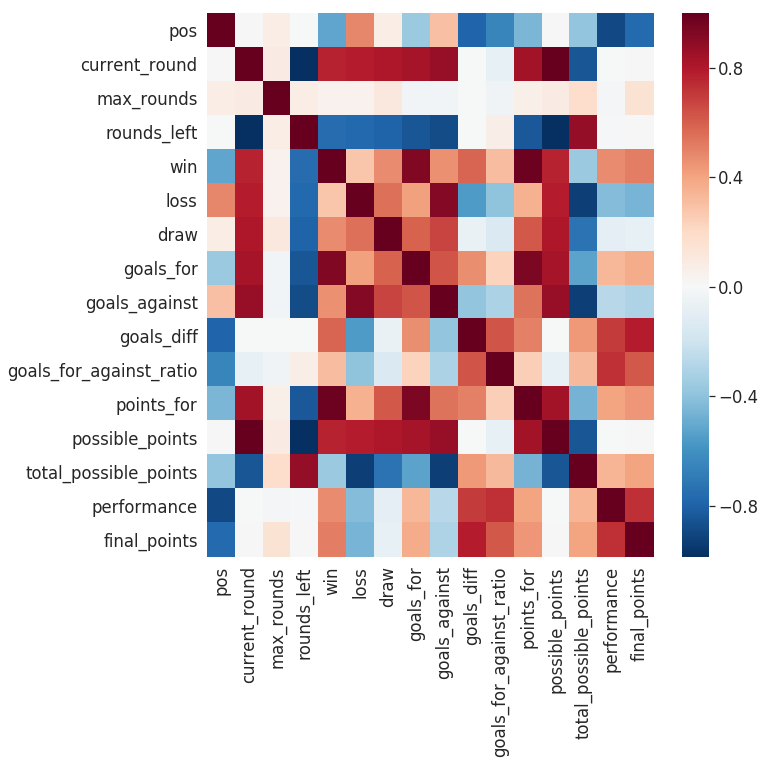

In [0]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), cmap = "RdBu_r")
plt.show()

In [0]:
# Variável preditora
X = df.drop(['final_points'], axis = 1)
# Variável alvo
y = df['final_points'].values.reshape(-1, 1)

In [0]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

http://setosa.io/ev/principal-component-analysis/<br>
https://en.wikipedia.org/wiki/Principal_component_analysis<br>
https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais

In [0]:
pca = PCA(15, random_state = seed)
pca.fit(scaled_X)
variance = pca.explained_variance_ratio_
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=7)*100)
var

array([51.96689, 82.15692, 89.47236, 93.23823, 96.09423, 98.39308,
       99.09342, 99.65312, 99.98183, 99.99999, 99.99999, 99.99999,
       99.99999, 99.99999, 99.99999])

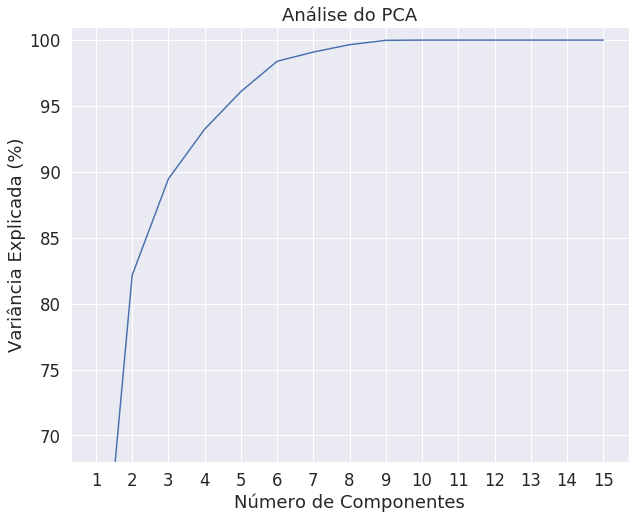

In [0]:
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set(xlabel = 'Número de Componentes', ylabel= 'Variância Explicada (%)', title = 'Análise do PCA', ylim=[68,101], xticks=list(range(1,16)))
sns.lineplot(x=list(range(1,16)), y=var, ax=ax1)
plt.show()

In [0]:
pca = PCA(.99, random_state = seed)
pca.fit(scaled_X)
data = pca.transform(scaled_X)
print(f'Percentual de variância explicada por cada componente: {np.round(pca.explained_variance_ratio_*100,3)}')
print(f'Percentual total de variância explicada pelas componente: {np.round(pca.explained_variance_ratio_*100,3).sum():.3f}%')

Percentual de variância explicada por cada componente: [51.967 30.19   7.315  3.766  2.856  2.299  0.7  ]
Percentual total de variância explicada pelas componente: 99.093%


In [0]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# `LinearRegression()`

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)

# para visualizar os coeficientes encontrados
print(f'Coeficiente: {model.coef_}')
print(f'Constante: {model.intercept_}')

# Realiza predições para o conjunto de testes
y_pred = model.predict(X_test)

# Exibe o R²
print(f'Primeira maneira de visualizar o R2: {model.score(X_test, y_test):.4f}')
print(f'Segunda maneira de visualizar o R2: {r2_score(y_test, y_pred):.4f}')

# Calcula e exibe o erro médio quadrático
print(f'Erro médio quadrático: {mean_squared_error(y_test, y_pred):.4f}')

# Calcula e exibe a raiz do erro médio quadrático
print(f'Raiz do erro médio quadrático: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Coeficiente: [[ 0.01309009  5.93037062 -2.23496688 -0.45723229 -0.94523822 -0.11277824
   0.65206204]]
Constante: [50.4739722]
Primeira maneira de visualizar o R2: 0.7284
Segunda maneira de visualizar o R2: 0.7284
Erro médio quadrático: 61.5896
Raiz do erro médio quadrático: 7.8479


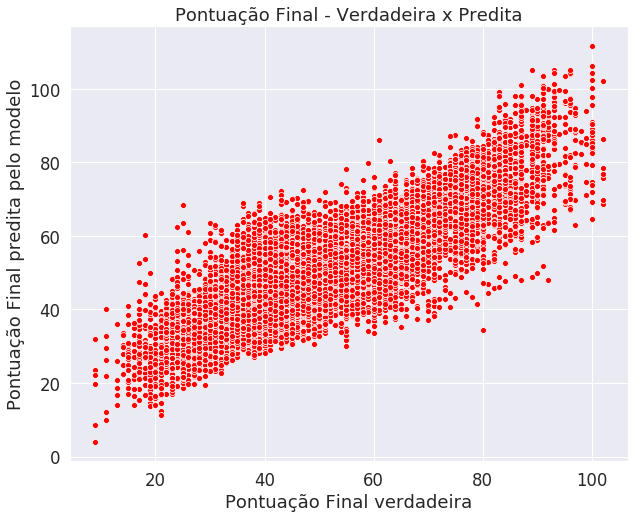

In [0]:
final_data = pd.DataFrame(np.hstack((y_test, y_pred)))
final_data.rename(index=str, columns={0: 'Actual', 1: 'Prediction'}, inplace=True)
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
sns.scatterplot(x='Actual', y='Prediction', data=final_data, ax=ax1, color='red')
ax1.set(xlabel = 'Pontuação Final verdadeira', ylabel= 'Pontuação Final predita pelo modelo', title = 'Pontuação Final - Verdadeira x Predita')
plt.show()

# `ElasticNet()`

In [0]:
model = ElasticNet(random_state = seed)
model.fit(X_train, y_train)
# para visualizar os coeficientes encontrados
print(f'Coeficiente: {model.coef_}')
print(f'Constante: {model.intercept_}')

# Realiza predições para o conjunto de testes
y_pred = model.predict(X_test)

# Exibe o R²
print(f'Primeira maneira de visualizar o R2: {model.score(X_test, y_test):.4f}')
print(f'Segunda maneira de visualizar o R2: {r2_score(y_test, y_pred):.4f}')

# Calcula e exibe o erro médio quadrático
print(f'Erro médio quadrático: {mean_squared_error(y_test, y_pred):.4f}')

# Calcula e exibe a raiz do erro médio quadrático
print(f'Raiz do erro médio quadrático: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Coeficiente: [ 0.          5.24139641 -1.22062403 -0.         -0.         -0.
  0.        ]
Constante: [50.47271373]
Primeira maneira de visualizar o R2: 0.7122
Segunda maneira de visualizar o R2: 0.7122
Erro médio quadrático: 65.2685
Raiz do erro médio quadrático: 8.0789


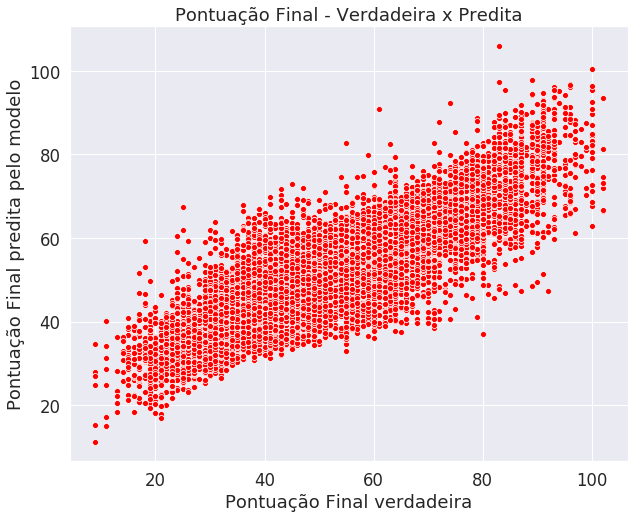

In [0]:
final_data = pd.DataFrame(np.hstack((y_test, y_pred.reshape(-1,1))))
final_data.rename(index=str, columns={0: 'Actual', 1: 'Prediction'}, inplace=True)
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
sns.scatterplot(x='Actual', y='Prediction', data=final_data, ax=ax1, color='red')
ax1.set(xlabel = 'Pontuação Final verdadeira', ylabel= 'Pontuação Final predita pelo modelo', title = 'Pontuação Final - Verdadeira x Predita')
plt.show()

# `KNeighborsRegressor()`

[KNN e os K vizinhos mais próximos](https://www.youtube.com/watch?v=gJK4fmCvcWY&t=0s)<br>

[KNN exemplo completo](https://www.youtube.com/watch?v=zvmbB3315Ko)

[KNNRegressor - Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

In [0]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Realiza predições para o conjunto de testes
y_pred = model.predict(X_test)

# Exibe o R²
print(f'Primeira maneira de visualizar o R2: {model.score(X_test, y_test):.4f}')
print(f'Segunda maneira de visualizar o R2: {r2_score(y_test, y_pred):.4f}')

# Calcula e exibe o erro médio quadrático
print(f'Erro médio quadrático: {mean_squared_error(y_test, y_pred):.4f}')

# Calcula e exibe a raiz do erro médio quadrático
print(f'Raiz do erro médio quadrático: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Primeira maneira de visualizar o R2: 0.7161
Segunda maneira de visualizar o R2: 0.7161
Erro médio quadrático: 64.3845
Raiz do erro médio quadrático: 8.0240


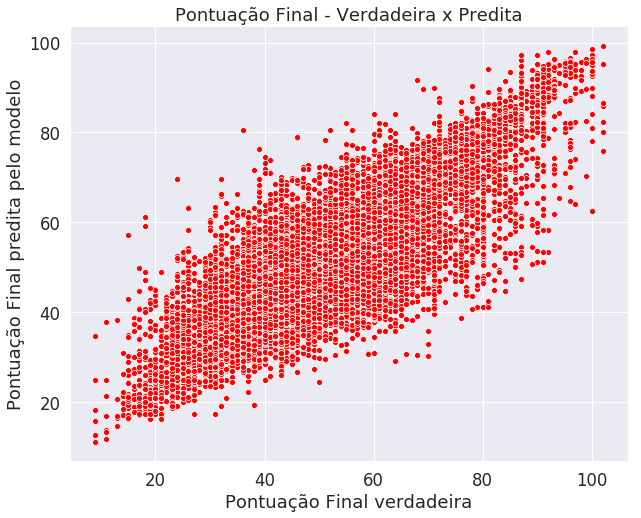

In [0]:
final_data = pd.DataFrame(np.hstack((y_test, y_pred.reshape(-1,1))))
final_data.rename(index=str, columns={0: 'Actual', 1: 'Prediction'}, inplace=True)
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
sns.scatterplot(x='Actual', y='Prediction', data=final_data, ax=ax1, color='red')
ax1.set(xlabel = 'Pontuação Final verdadeira', ylabel= 'Pontuação Final predita pelo modelo', title = 'Pontuação Final - Verdadeira x Predita')
plt.show()

# `RandomizedSearchCV()`

[Comparing randomized search and grid search for hyperparameter estimation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html)<br>

[Hyperparameter Optimization in Machine Learning Models](https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models)

In [0]:
from sklearn.model_selection import RandomizedSearchCV
params = {'alpha': [0.5, 1, 1.5, 2, 2.5], 'l1_ratio': [0.1, 0.2, 0.5, 0.8, 1],'warm_start': [True, False]} 

en = ElasticNet(selection = 'random', precompute = True, max_iter=10000)
model = RandomizedSearchCV(en, param_distributions = params, cv=10, random_state = seed)

model.fit(X_train, y_train)
model.best_params_

{'alpha': 0.5, 'l1_ratio': 0.8, 'warm_start': False}

In [0]:
model = ElasticNet(warm_start = False, l1_ratio = 0.8, alpha = 0.5, max_iter=10000, selection = 'random', precompute = True, random_state = seed)
model.fit(X_train, y_train)
# para visualizar os coeficientes encontrados
print(f'Coeficiente: {model.coef_}')
print(f'Constante: {model.intercept_}')

# Realiza predições para o conjunto de testes
y_pred = model.predict(X_test)

# Exibe o R²
print(f'Primeira maneira de visualizar o R2: {model.score(X_test, y_test):.4f}')
print(f'Segunda maneira de visualizar o R2: {r2_score(y_test, y_pred):.4f}')

# Calcula e exibe o erro médio quadrático
print(f'Erro médio quadrático: {mean_squared_error(y_test, y_pred):.4f}')

# Calcula e exibe a raiz do erro médio quadrático
print(f'Raiz do erro médio quadrático: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Coeficiente: [ 0.          5.71576076 -1.71328708 -0.         -0.01586739 -0.
  0.        ]
Constante: [50.4734594]
Primeira maneira de visualizar o R2: 0.7246
Segunda maneira de visualizar o R2: 0.7246
Erro médio quadrático: 62.4588
Raiz do erro médio quadrático: 7.9031


In [0]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,15,20, 25, 30, 35], 'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan', 'chebyshev'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']} 

knn = KNeighborsRegressor()
model = RandomizedSearchCV(knn, param_distributions = params, cv=10, random_state = 42)

model.fit(X_train, y_train)
model.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 25,
 'weights': 'uniform'}

In [0]:
final_model = KNeighborsRegressor(n_neighbors = 25, weights = 'uniform', metric = 'manhattan', algorithm = 'brute')
final_model.fit(X_train, y_train)

# Realiza predições para o conjunto de testes
y_pred = final_model.predict(X_test)

# Exibe o R²
print(f'Primeira maneira de visualizar o R2: {model.score(X_test, y_test):.4f}')
print(f'Segunda maneira de visualizar o R2: {r2_score(y_test, y_pred):.4f}')

# Calcula e exibe o erro médio quadrático
print(f'Erro médio quadrático: {mean_squared_error(y_test, y_pred):.4f}')

# Calcula e exibe a raiz do erro médio quadrático
print(f'Raiz do erro médio quadrático: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Primeira maneira de visualizar o R2: 0.7489
Segunda maneira de visualizar o R2: 0.7489
Erro médio quadrático: 56.9504
Raiz do erro médio quadrático: 7.5466


# Validação Cruzada

LRM: R2 médio: 0.7217, Desvio padrão do R2: 0.0318
ENM: R2 médio: 0.7090, Desvio padrão do R2: 0.0294
KNN: R2 médio: 0.7275, Desvio padrão do R2: 0.0391


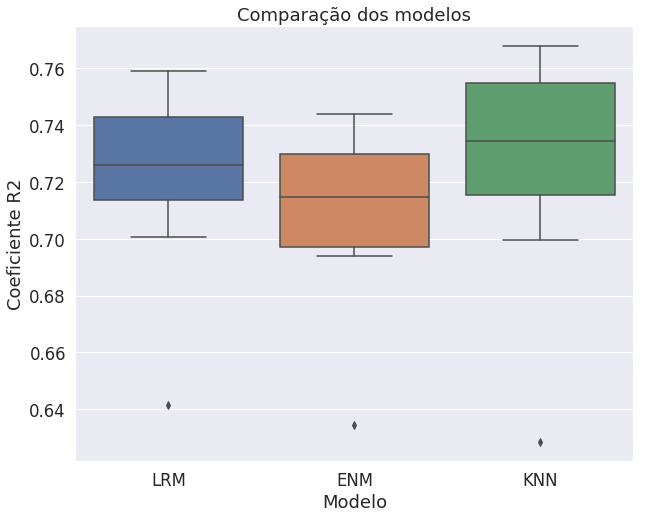

In [0]:
from sklearn.model_selection import KFold, cross_val_score
# prepare models
models = []
models.append(('LRM', LinearRegression()))
models.append(('ENM', ElasticNet(warm_start = False, l1_ratio = 0.5, alpha = 0.8, max_iter=10000, selection = 'random', precompute = True, random_state = seed)))
models.append(('KNN', KNeighborsRegressor(n_neighbors = 25, weights = 'uniform', metric = 'manhattan', algorithm = 'brute')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, data, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: R2 médio: {cv_results.mean():.4f}, Desvio padrão do R2: {cv_results.std():.4f}')

# Boxplot para comparar os modelos
fig, ax1 = plt.subplots(ncols=1, figsize=(10, 8))
sns.boxplot(x=names,y=results, ax=ax1)
ax1.set(xlabel = 'Modelo', ylabel= 'Coeficiente R2', title = 'Comparação dos modelos')
plt.show()

# Previsão campeonato brasileiro 2019

In [0]:
def get_table(current_round, max_rounds, league, season, flag):
    dfs = pd.read_html(f'https://www.worldfootball.net/schedule/{league}-{season}-{flag}{current_round}', header=0)
    df = dfs[3]
    df.drop(['Team'], inplace=True, axis=1)

    df.rename(index=str, columns={'#': 'pos', 'Team.1': 'team', 'M.': 'current_round', 'W': 'win',
                                  'D': 'draw', 'L': 'loss', 'goals': 'goals',
                                  'Dif.': 'goals_diff', 'Pt.': 'points_for'}, inplace=True)
    aux = df['goals'].str.split(':', n = 1, expand = True)
    df['goals_for'] = aux[0] 
    df['goals_against'] = aux[1] 
    df.drop(columns = ['goals'], inplace = True)
    df = df.apply(pd.to_numeric, errors='ignore')
    df['pos'] =  pd.to_numeric(df.index) + 1
    df['max_rounds'] = max_rounds
    df['rounds_left'] = df['max_rounds'] - df['current_round']
    df['possible_points'] = df['current_round'] * 3
    df['performance'] = np.round((df['points_for'] / df['possible_points']) * 100, 2)
    df['performance'].replace(np.inf, df['points_for'], inplace=True)
    df.fillna(value={'performance': 0}, inplace=True)
    df['total_possible_points'] = df['points_for'] + (df['rounds_left'] * 3)
    df['goals_for_against_ratio'] = df['goals_for'] / df['goals_against']
    df['goals_for_against_ratio'].replace(np.inf, df['goals_for'], inplace=True)
    df.fillna(value={'goals_for_against_ratio': 0}, inplace=True)
    df['goals_for_against_ratio'] = np.round(df['goals_for_against_ratio'], 3)
    df['league'] = league
    df['season'] = season
    columns = ['pos', 'team', 'current_round', 'max_rounds', 'rounds_left', 'win', 'loss', 'draw', 
               'goals_for', 'goals_against', 'goals_diff', 'goals_for_against_ratio', 'points_for', 
               'possible_points', 'total_possible_points', 'performance', 'league', 'season']
    df = df[columns]
    return df

In [0]:
df_bra_2019 = get_table(13, 38, 'bra-serie-a', 2019, 'spieltag/')
df_bra_2019.drop(['league', 'season'], axis=1, inplace=True)
df_bra_2019.head()

,pos,team,current_round,max_rounds,rounds_left,win,loss,draw,goals_for,goals_against,goals_diff,goals_for_against_ratio,points_for,possible_points,total_possible_points,performance
0,1,Santos FC,13,38,25,10,1,2,23,9,14,2.556,32,39,107,82.05
1,2,Palmeiras,13,38,25,8,1,4,21,7,14,3.000,28,39,103,71.79
2,3,Flamengo RJ,13,38,25,7,3,3,25,16,9,1.562,24,39,99,61.54
3,4,Atlético Mineiro,13,38,25,7,3,3,20,14,6,1.429,24,39,99,61.54
4,5,Corinthians SP,13,38,25,6,2,5,15,8,7,1.875,23,39,98,58.97


In [0]:
teams = df_bra_2019['team']
teams_df = pd.DataFrame(teams)
X_bra_2019 = df_bra_2019.drop(['team'], axis=1)
scaled_X_bra_2019 = scaler.fit_transform(X_bra_2019)
pca_X_bra_2019 = pca.transform(scaled_X_bra_2019)

In [0]:
df.columns

Index(['pos', 'current_round', 'max_rounds', 'rounds_left', 'win', 'loss',
       'draw', 'goals_for', 'goals_against', 'goals_diff',
       'goals_for_against_ratio', 'points_for', 'possible_points',
       'total_possible_points', 'performance', 'final_points'],
      dtype='object')

In [0]:
# Realiza predições para o conjunto da dados do Brasileirão 2019
y_pred_bra_2019 = final_model.predict(pca_X_bra_2019)
y_pred_bra_2019 = pd.DataFrame(np.round(y_pred_bra_2019,0))
pred_table = pd.concat([teams_df.reset_index(), y_pred_bra_2019.reset_index()], axis=1).drop(['index'], axis=1).sort_values(0, ascending=False).reset_index()
pred_table['index'] = np.arange(1,21)
pred_table.columns = ['pos', 'team', 'points']
pred_table

,pos,team,points
0,1,Santos FC,90.0
1,2,Palmeiras,83.0
2,3,Flamengo RJ,74.0
3,4,Atlético Mineiro,71.0
4,5,Corinthians SP,69.0
5,6,São Paulo FC,69.0
6,7,Athletico Paranaense,66.0
7,8,Internacional,58.0
8,9,Botafogo - RJ,56.0
9,10,EC Bahia,54.0
